In [1]:
%load_ext autoreload
%autoreload 2

Using backend: pytorch



	# 1. Generate train and test datasets



/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


0it [00:00, ?it/s]

Generated graphs with   5 nodes are at  82.0% planar in average
Generated graphs with   6 nodes are at  62.7% planar in average
Generated graphs with   7 nodes are at  50.8% planar in average
Generated graphs with   8 nodes are at  55.5% planar in average
Generated graphs with   9 nodes are at  64.0% planar in average
Generated graphs with  10 nodes are at  47.5% planar in average
Generated graphs are at  58.7% planar in average

	# 2. Train model



  0%|          | 0/930 [00:00<?, ?it/s]

  0%|          | 0/930 [00:00<?, ?it/s]

/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_splits=10, n_repeats=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 99.892% ± 0.323% for C=100.0


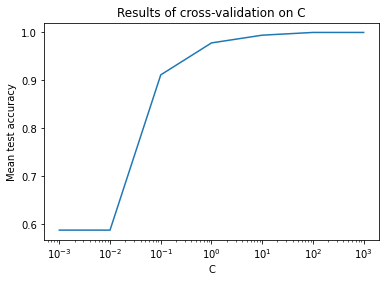

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=47),
             estimator=SVC(kernel='precomputed', random_state=76), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted)})

	# 3. Smoke-test model

Skipped

	# 4. Investigate capabilities


	# 4. Investigate generalisation capabilities


	#   - Test set [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] nodes in numbers [500, 500, 500, 500, 500, 500, 500, 500, 300, 300, 300, 300, 300, 150, 150, 150, 100, 100]



  0%|          | 0/6150 [00:00<?, ?it/s]

  0%|          | 0/6150 [00:00<?, ?it/s]

dist1 loop:   0%|          | 0/6150 [00:00<?, ?it/s]

[[2704    4]
 [ 207 3235]]
              precision    recall  f1-score   support

  Non-planar       0.93      1.00      0.96      2708
      Planar       1.00      0.94      0.97      3442

    accuracy                           0.97      6150
   macro avg       0.96      0.97      0.97      6150
weighted avg       0.97      0.97      0.97      6150


	### Score: 96.57% (f1-score for planar: 0.968 & non-planar: 0.962)
CPU times: user 2h 37min 17s, sys: 7min 44s, total: 2h 45min 1s
Wall time: 2h 48min


In [2]:
%%time
from qplanarity import test_suite

times = [2.1, 1.6]
pulses = [0.2, 0.1]

generator = 'binomial'
metric = 'f1-score'
test_big=False
test_ramping_max_n = None

train_ns = range(5, 11)
train_nbs = [100, 110, 120] + 3 * [200]

test_ns = list(range(3, 21))
test_nbs = [500] * 8 + [300] * 5 + [150] * 3 + [100] * 2
all_results = test_suite(times, pulses, train_ns, train_nbs, generator, seed=21, metric=metric, 
                 test_ns=test_ns, test_nbs=test_nbs, test_smoke=False, test_big=test_big, test_ramping_max_n=test_ramping_max_n,
                return_all=True)

In [3]:
# Update with return_all to see how it scores for each + add histograms on nb trained for each nb od nodes & nb predicts (with 2 colors for planar & not + 2 colors for correct or not)

In [4]:
y_true, y_pred = all_results[4:6]
len(y_true), len(y_pred)

(6150, 6150)

In [5]:
start = 0
for nb in test_nbs:
    r = [start, start + nb]  # range
    
    start += nb

6150 6150 930


/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

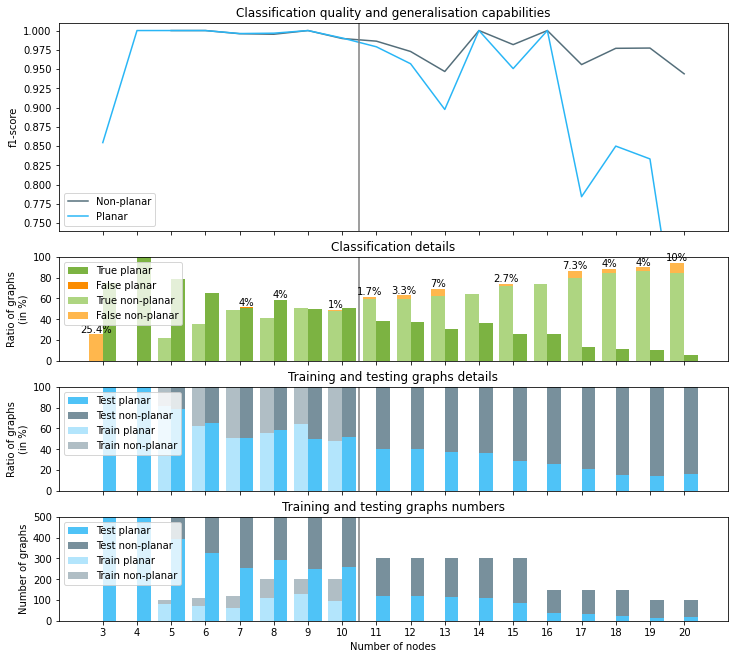

In [20]:
from qplanarity import results_graph
results_graph(all_results, train_nbs, train_ns, test_nbs, test_ns, '5->10')